# Busqueda features en titulo y descripcion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('../data/test.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio'] = df['fecha'].dt.year
df["mes"] = df['fecha'].dt.month
df["dia"] = df['fecha'].dt.day

df = df.drop(columns=["lat","lng"])

df["descripcion"] = df["descripcion"].fillna("")
df["titulo"] = df["titulo"].fillna("")

In [3]:
import re
def contiene_frase(texto, frase):
    if re.search(frase, texto,re.IGNORECASE):
        return 1
    return 0

contiene_frase=np.vectorize(contiene_frase)

In [4]:
def cantidad_de_publicaciones(data, columna, palabra):
    return data[contiene_frase(data[columna], palabra)].dia.count()

def serie_que_contiene_palabra(data, columna, palabra):
    return contiene_frase(data[columna], palabra)

## Wordclouds

Para saber qué palabras pueden sernos de interes, hacemos wordclouds para guiarnos

In [5]:
from wordcloud import WordCloud, STOPWORDS
    
def wordcloud_freq(data):

    text = data
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate_from_frequencies(frequencies=data)
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [6]:
# stopwords son palabras que no nos interesan en nuestro analisis
from stop_words import get_stop_words

stop_words = get_stop_words('spanish')

stopwords = ["en", "a", "al", "de", "la", "y", "el", "del", "las", "los", "-"]

stopwords.extend(stop_words)
stopwords.extend(STOPWORDS)

### Wordcloud título

In [7]:
palabras_titulo = pd.Series([palabra.replace("\'", "") for titulos in df["titulo"] for palabra in titulos.split()])

In [8]:
dict_palabras_titulo = palabras_titulo.loc[~palabras_titulo.isin(stopwords)].groupby(palabras_titulo).size().to_dict()

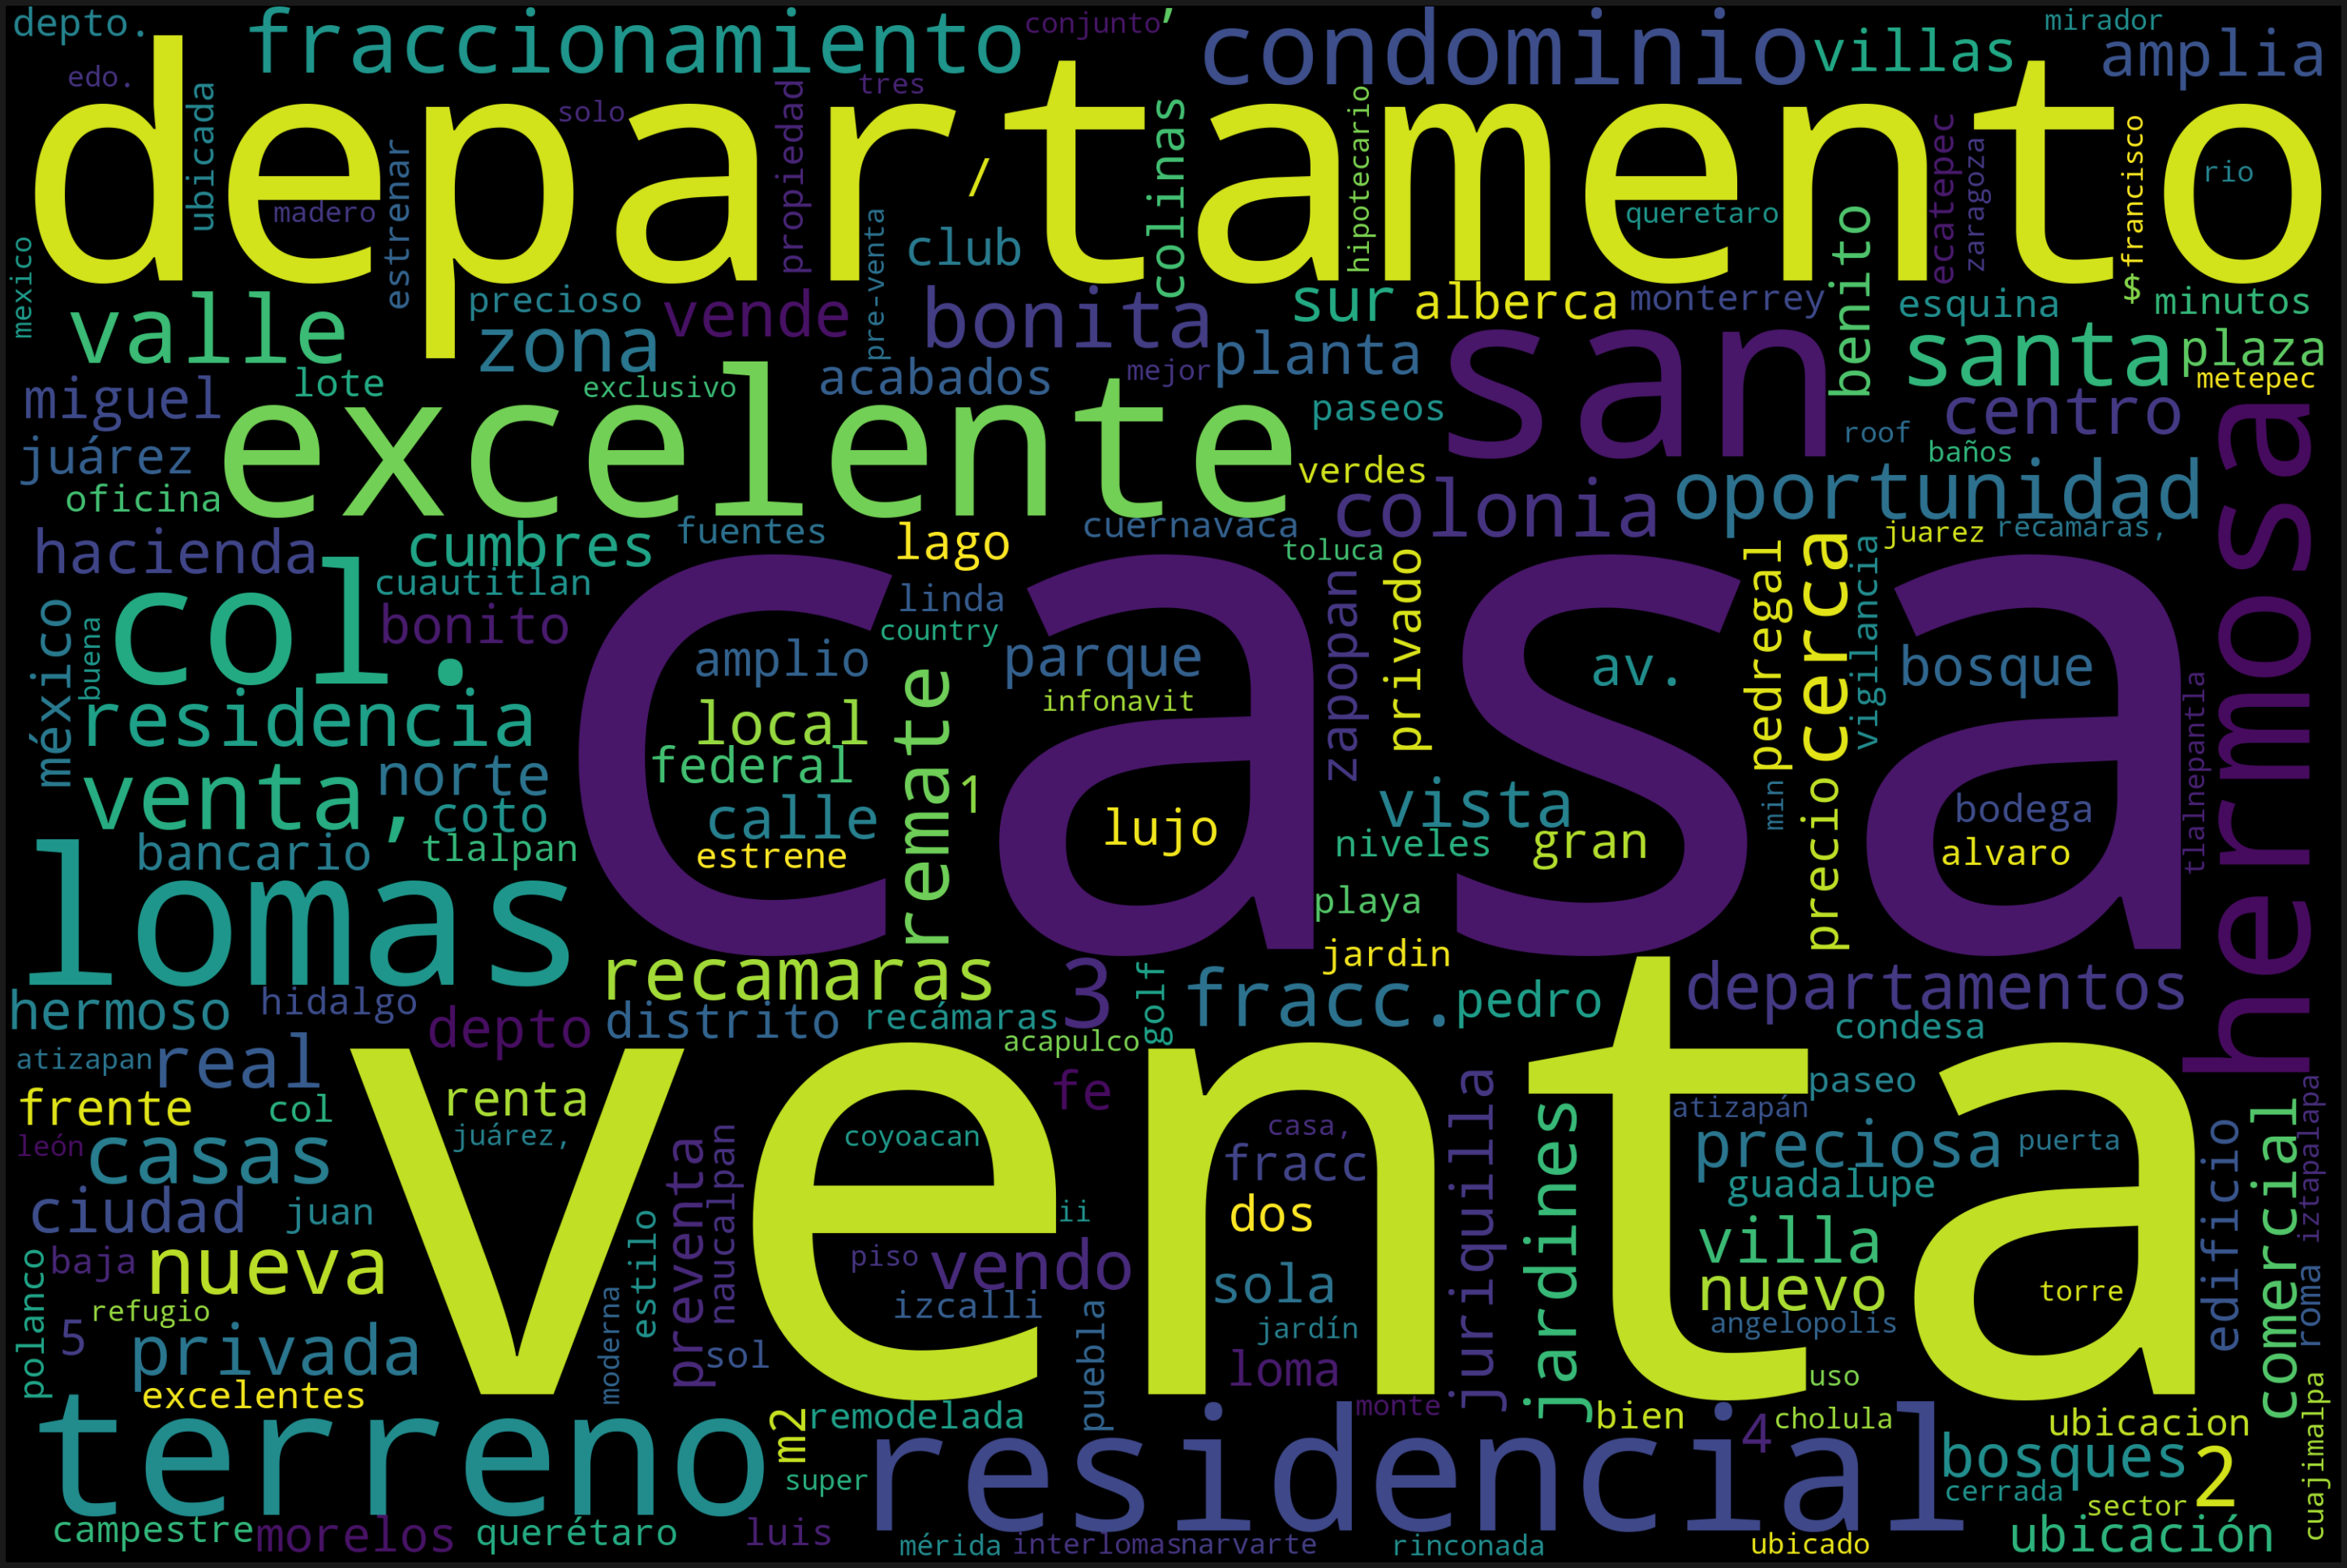

In [9]:
wordcloud_freq(dict_palabras_titulo)

In [10]:
#series_palabras_titulo = df["titulo"].str.split().apply(pd.Series).unstack().dropna().str.replace("\'", "")

In [11]:
#wordcloud_freq(series_palabras_titulo.loc[~series_palabras_titulo.isin(stopwords)].value_counts().to_dict())

In [12]:
#del series_palabras_titulo

### Wordcloud descripción

In [13]:
# NO USAR. SUPER INEFICIENTE HACER EL APPLY, ES GIGANTE series_palabras_descripcion = df["descripcion"].str.split().apply(pd.Series).unstack().dropna().str.replace("\'", "")

In [14]:
#reg = re.compile(re.escape('.*[!|&nbsp;|<p>|</p>|.|<em>|</em>|<strong>|</strong>|<br>|<li>|</li>|www|\n].*'), re.IGNORECASE)
#df["descripcion"].str.replace(reg, '', regex=True)

In [15]:
palabras_descripcion = pd.Series([palabra for descripcion in df["descripcion"] for palabra in descripcion.split()])

In [16]:
dict_palabras_descripcion = palabras_descripcion.loc[~palabras_descripcion.isin(stopwords)].groupby(palabras_descripcion).size().to_dict()

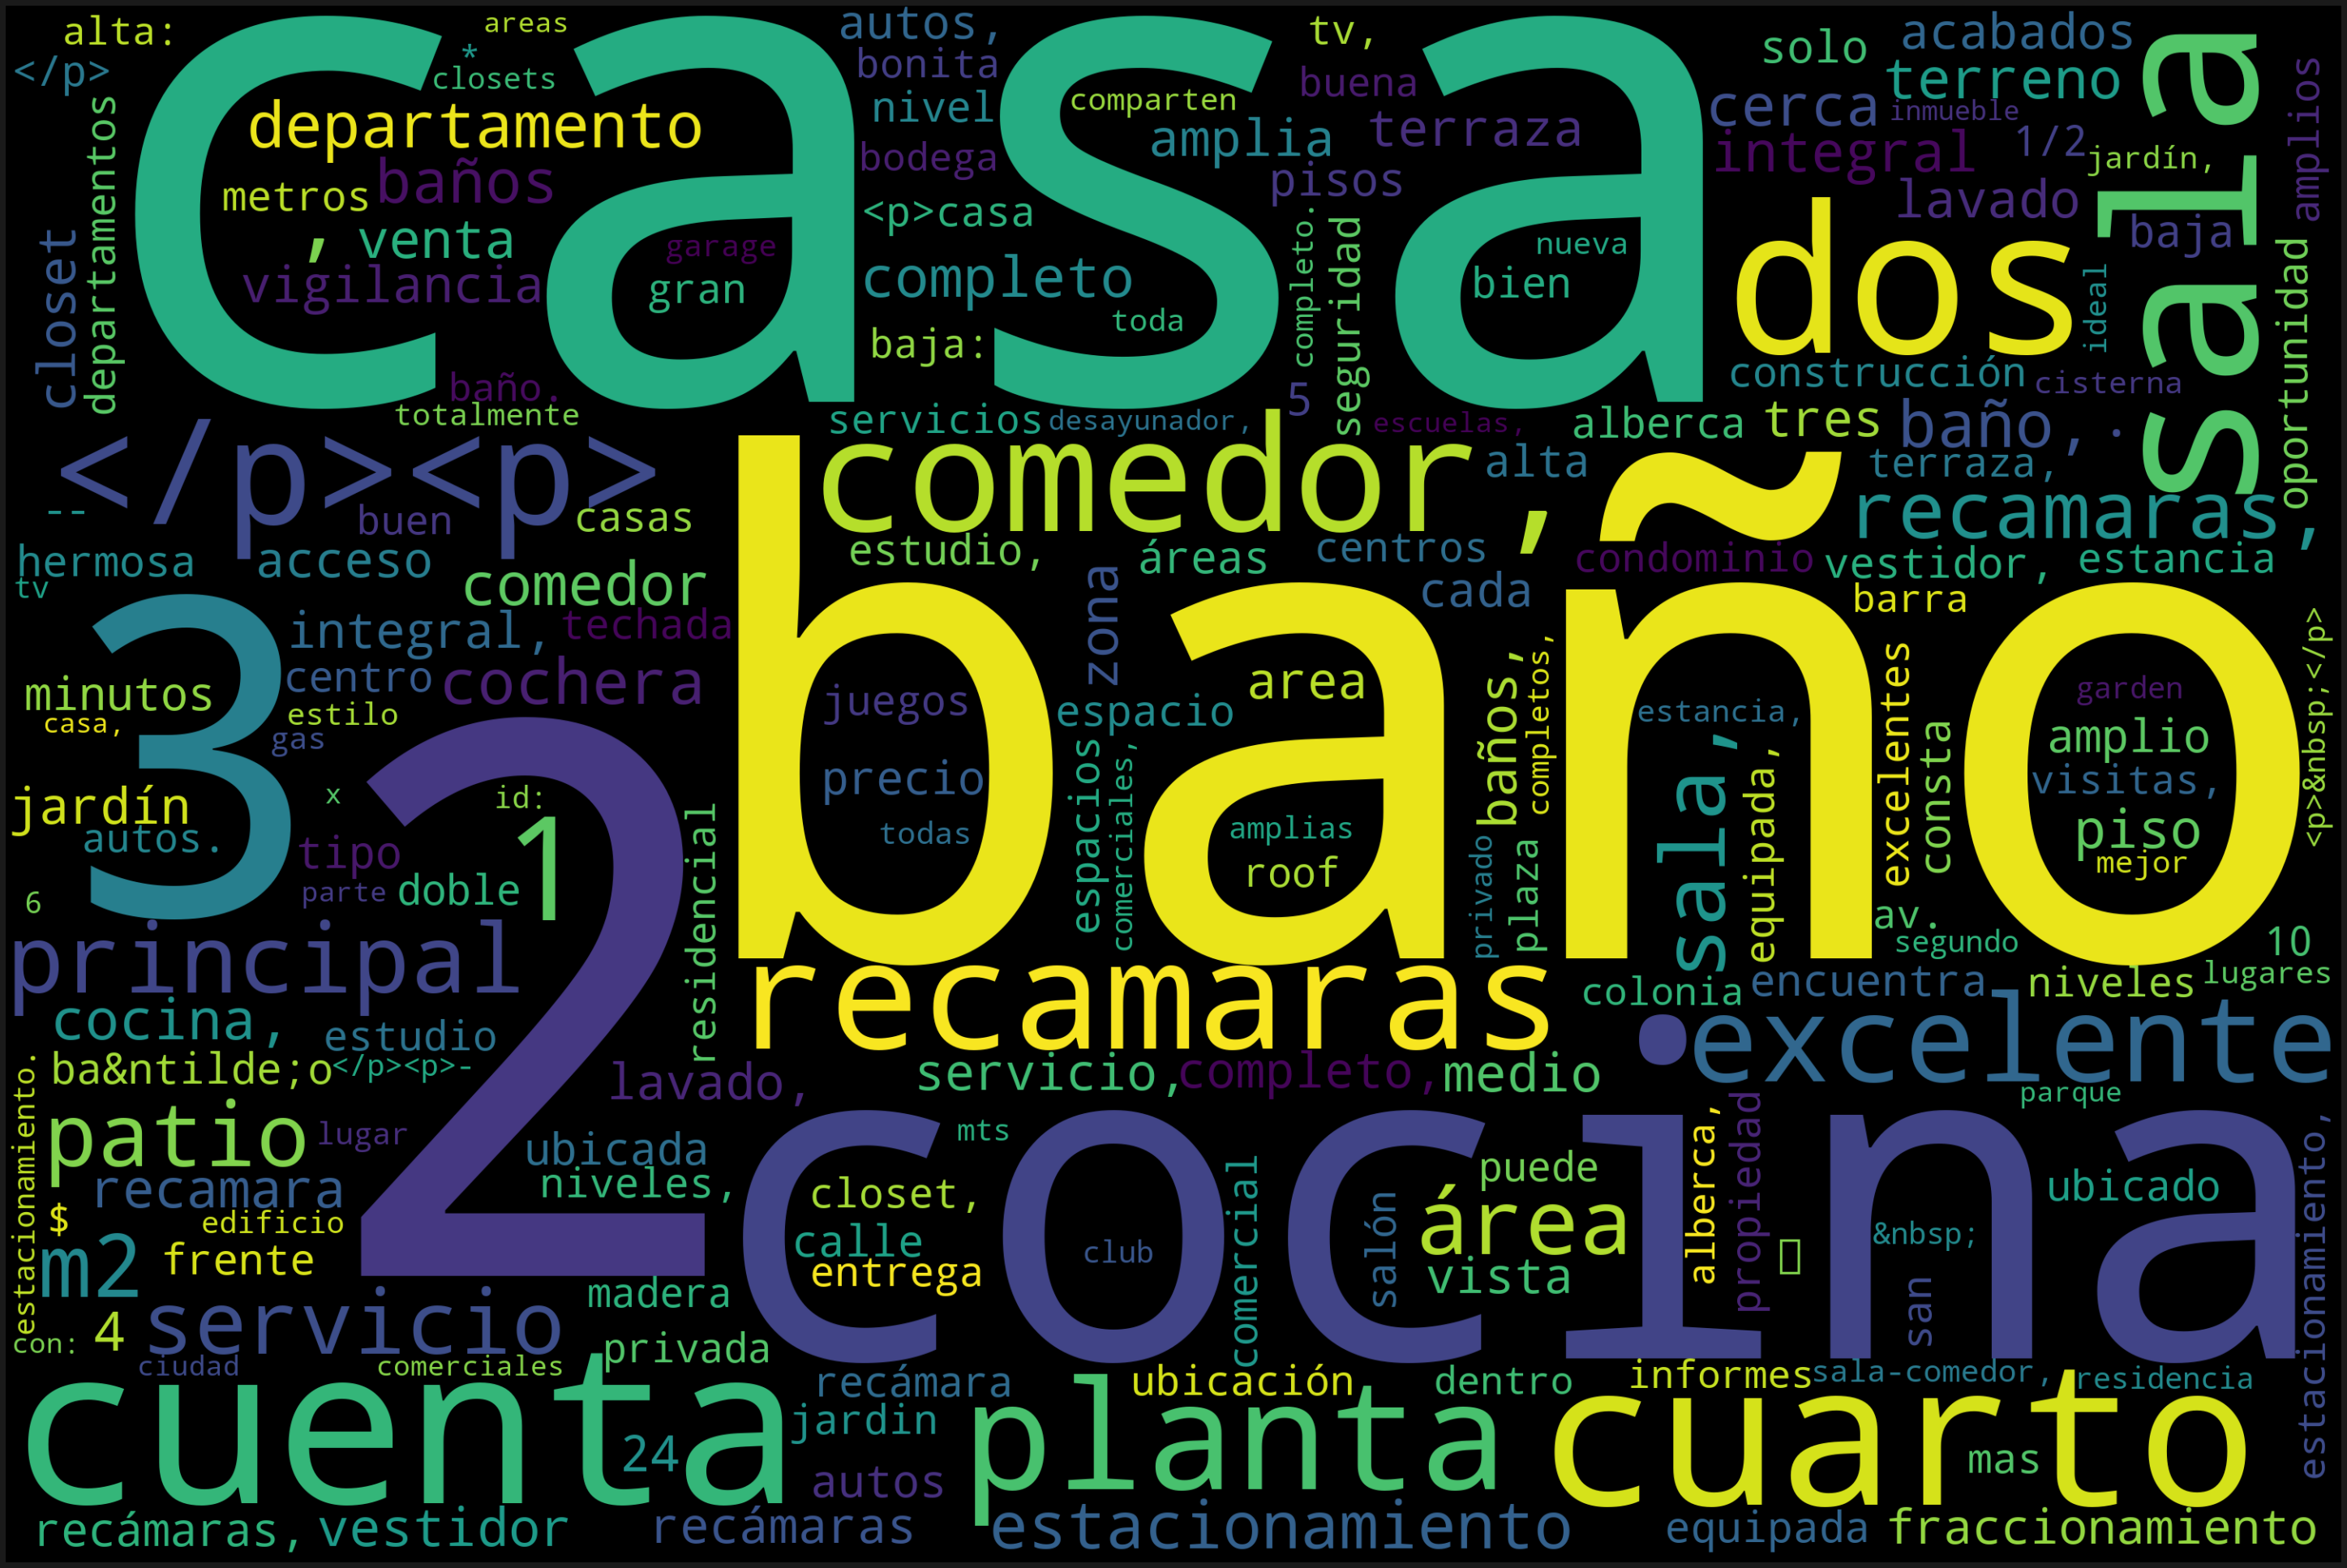

In [17]:
wordcloud_freq(dict_palabras_descripcion)

## Búsqueda palabras clave

In [7]:
# helpers

In [8]:
def contiene(df, columna, palabra):
    return df[columna].str.contains(palabra).astype(int)

In [9]:
def contiene_alguna(df, columna, palabras):
    result = df[columna].apply(lambda x: 0)
    for palabra in palabras:
        result = result | contiene(df, columna, palabra)
        
    return result    

In [10]:
df["descripcion"].loc[239984]

KeyError: 239984

In [11]:
# del wordcloud
df["amenities"] = contiene_alguna(df, "descripcion",["amenities"]) |contiene_alguna(df, "titulo",["amenities"])
df["iluminada"] = contiene_alguna(df, "descripcion",["iluminada","iluminacion"]) |contiene_alguna(df, "titulo",["iluminada","iluminacion"])
df["funcional"] = contiene_alguna(df, "descripcion",["funcional"]) |contiene_alguna(df, "titulo",["funcional"])
#df["integral"] = contiene_alguna(df, "descripcion",["integral"]) |contiene_alguna(df, "titulo",["integral"])
df["discreta"] = contiene_alguna(df, "descripcion",["discreta"]) |contiene_alguna(df, "titulo",["discreta"])
df["inversion"] = contiene_alguna(df, "descripcion",["inversion","oportunidad","invertir"]) |contiene_alguna(df, "titulo",["inversion","oportunidad","invertir"])
df["moderno"] = contiene_alguna(df, "descripcion",["moderno","modernidad"]) |contiene_alguna(df,"titulo",["moderno","modernidad"])
df["calentador"] = contiene_alguna(df, "descripcion",["calentador","calefaccion","calor"]) |contiene_alguna(df, "titulo",["calentador","calefaccion","calor"])


df["hermosa"] = contiene_alguna(df, "descripcion", ["hermosa", "bonita", "bonito", "linda", "cholula", "cholulo", "preciosa", "precioso"]) | contiene_alguna(df, "titulo", ["hermosa", "bonita", "bonito", "linda", "cholula", "cholulo", "precioso", "preciosa"])
df["excelente"] = contiene_alguna(df, "descripcion", ["excelente", "excelentes"]) | contiene_alguna(df, "titulo", ["excelente", "excelentes"])
df["mejor"] = contiene_alguna(df, "descripcion", ["mejor", "mejores"]) | contiene_alguna(df, "titulo", ["mejor", "mejores"])
df["grande"] = contiene_alguna(df, "descripcion", ["grande", "gran", "amplia", "amplias", "amplio", "amplios"]) | contiene_alguna(df, "titulo", ["grande", "gran", "amplia", "amplias", "amplio", "amplios"])
df["equipada"] = contiene_alguna(df, "descripcion", ["equipada", "equipado", "completa", "completo"]) | contiene_alguna(df, "descripcion", ["equipada", "equipado", "completa", "completo"])
df["vestidor"] = contiene_alguna(df, "descripcion", ["vestidor", "closet"]) | contiene_alguna(df, "titulo", ["vestidor", "closet"])
df["credito"] = contiene_alguna(df, "descripcion", ["credito", "crédito", "créditos", "creditos", "banco", "banca", "bancario", "bancarios", "hipoteca"]) | contiene_alguna(df, "titulo", ["credito", "crédito", "créditos", "creditos", "banco", "banca", "bancario", "bancarios", "hipoteca"])
df["privada"] = contiene_alguna(df, "descripcion", ["privada", "privado"]) | contiene_alguna(df, "titulo", ["privada", "privado"])
df["bodega"] = contiene_alguna(df, "descripcion", ["bodega"]) | contiene_alguna(df, "titulo", ["bodega"])
df["club"] = contiene_alguna(df, "descripcion", ["club"]) | contiene_alguna(df, "titulo", ["club"])
df["cerrada"] = contiene_alguna(df, "descripcion", ["cerrada", "cerrado"]) | contiene_alguna(df, "titulo", ["cerrada", "cerrado"])
df["jardin"] = contiene_alguna(df, "descripcion", ["jardin", "jardín", "garden", "patio"]) | contiene_alguna(df, "titulo", ["jardin", "jardín", "garden", "patio"])
df["oportunidad"] = contiene_alguna(df, "descripcion", ["oportunidad"]) | contiene_alguna(df, "titulo", ["oportunidad"])
df["tv"] = contiene_alguna(df, "descripcion", ["tv", "tele", "television", "televisión", "televisor"]) | contiene_alguna(df, "titulo", ["tv", "tele", "television", "televisión", "televisor"])
df["juegos"] = contiene_alguna(df, "descripcion", ["juego"]) | contiene_alguna(df, "titulo", ["juego"])
df["niño"] = contiene_alguna(df, "descripcion", ["niño", "niña", "infantil"]) | contiene_alguna(df, "titulo", ["niño", "niña", "infantil"])
df["transporte"] = contiene_alguna(df, "descripcion", ["transporte"]) | contiene_alguna(df, "titulo", ["transporte"])
df["estudio"] = contiene_alguna(df, "descripcion", ["estudio"]) | contiene_alguna(df, "titulo", ["estudio"])
df["terraza"] = contiene_alguna(df, "descripcion", ["terraza"]) | contiene_alguna(df, "titulo", ["terraza"])
df["balcon"] = contiene_alguna(df, "descripcion", ["balcón", "balcon"]) | contiene_alguna(df, "titulo", ["balcón", "balcon"])
df["lote"] = contiene_alguna(df, "descripcion", ["lote", "terreno"]) | contiene_alguna(df, "titulo", ["lote", "terreno"])
df["fraccionamiento"] = contiene_alguna(df, "descripcion", ["fraccionamiento", "fracc"]) | contiene_alguna(df, "titulo", ["fraccionamiento", "fracc"])
df["local"] = contiene_alguna(df, "descripcion", ["local", "tienda", "comercial"]) | contiene_alguna(df, "titulo", ["local", "tienda", "comercial"])
df["seguridad"] = contiene_alguna(df, "descripcion", ["vigilancia", "vigilador", "seguridad", "guardia"]) | contiene_alguna(df, "titulo", ["vigilancia", "vigilador", "seguridad", "guardia"])
df["garage"] = contiene_alguna(df, "descripcion", ["garage", "auto", "estacionamiento"]) | contiene_alguna(df, "titulo", ["garage", "auto", "estacionamiento"])
df["centro"] = contiene_alguna(df, "descripcion", ["centro", "central", "cercano", "cercania", "minuto","minutos"]) | contiene_alguna(df, "titulo", ["centro", "central", "cercano", "cercania", "minuto","minutos"])
df["techada"] = contiene_alguna(df, "descripcion", ["techada", "techado", "roof"]) | contiene_alguna(df, "titulo", ["techada", "techado", "roof"])
df["estancia"] = contiene_alguna(df, "descripcion", ["estancia"]) | contiene_alguna(df, "titulo", ["estancia"])
df["alberca"] = contiene_alguna(df, "descripcion", ["alberca"]) | contiene_alguna(df, "titulo", ["alberca"])
df["servicios"] = contiene_alguna(df, "descripcion", ["servicios"]) | contiene_alguna(df, "titulo", ["servicios"])
df["servicio"] = contiene_alguna(df, "descripcion", ["servicio"]) | contiene_alguna(df, "titulo", ["servicio"])
df["estilo"] = contiene_alguna(df, "descripcion", ["estilo"]) | contiene_alguna(df, "titulo", ["estilo"])
df["frente"] = contiene_alguna(df, "descripcion", ["frente"]) | contiene_alguna(df, "titulo", ["frente"])
df["vista"] = contiene_alguna(df, "descripcion", ["vista"]) | contiene_alguna(df, "titulo", ["vista"])
df["visitas"] = contiene_alguna(df, "descripcion", ["visita"]) | contiene_alguna(df, "titulo", ["visita"])
df["parque"] = contiene_alguna(df, "descripcion", ["parque", "plaza", "verde"]) | contiene_alguna(df, "titulo", ["parque", "plaza", "verde"])
df["areas"] = contiene_alguna(df, "descripcion", ["area", "área"]) | contiene_alguna(df, "titulo", ["area", "área"])
df["estrenar"] = contiene_alguna(df, "descripcion", ["estrenar", "estreno", "estrene"]) | contiene_alguna(df, "titulo", ["estrenar", "estreno", "estrene"])
df["infonavit"] = contiene_alguna(df, "descripcion", ["infonavit"]) | contiene_alguna(df, "titulo", ["infonavit"])
df["residencial"] = contiene_alguna(df, "descripcion", ["residencia"]) | contiene_alguna(df, "titulo", ["residencia"])
df["escuela"] = contiene_alguna(df, "descripcion", ["escuela", "colegio", "educacion", "educación", "uni", "universidad", "facultad"]) | contiene_alguna(df, "titulo", ["escuela", "colegio", "educacion", "educación", "uni", "universidad", "facultad"])
df["exclusivo"] = contiene_alguna(df, "descripcion", ["exclusivo", "exclusividad","exclusiva"]) | contiene_alguna(df, "titulo", ["exclusivo", "exclusividad","exclusiva"])
df["lujo"] = contiene_alguna(df, "descripcion", ["lujo","lujoso","lujosa"]) | contiene_alguna(df, "titulo", ["lujo","lujoso","lujosa"])
df["esquina"] = contiene_alguna(df, "descripcion", ["esquina"]) | contiene_alguna(df, "titulo", ["esquina"])
df["refaccion"] = contiene_alguna(df, "descripcion", ["refaccion", "refacción", "reacondicionado", "remodelada", "remodelado"]) | contiene_alguna(df, "titulo", ["refaccion", "refacción", "reacondicionado", "remodelada", "remodelado"])
df["country"] = contiene_alguna(df, "descripcion", ["country"]) | contiene_alguna(df, "titulo", ["country"])
df["barra"] = contiene_alguna(df, "descripcion", ["barra"]) | contiene_alguna(df, "titulo", ["barra"])
df["lavado"] = contiene_alguna(df, "descripcion", ["lavado"]) | contiene_alguna(df, "titulo", ["lavado"])
df["renta"] = contiene_alguna(df, "descripcion", ["renta", "alquiler", "alquilar"]) | contiene_alguna(df, "titulo", ["renta", "alquiler", "alquilar"])
df["super"] = contiene_alguna(df, "descripcion", ["super"]) | contiene_alguna(df, "titulo", ["super"])
df["lago"] = contiene_alguna(df, "descripcion", ["lago"]) | contiene_alguna(df, "titulo", ["lago"])
df["bosque"] = contiene_alguna(df, "descripcion", ["bosque", "arbol", "árbol"]) | contiene_alguna(df, "titulo", ["bosque", "arbol", "árbol"])
df["avenida"] = contiene_alguna(df, "descripcion", ["av", "avenida"]) | contiene_alguna(df, "titulo", ["av", "avenida"])
df["hospital"] = contiene_alguna(df, "descripcion", ["hospital", "medicina", "medico", "médico", "farmacia"]) | contiene_alguna(df, "titulo", ["hospital", "medicina", "medico", "médico", "farmacia"])
df["pileta"] = contiene_alguna(df, "descripcion", ["pileta", "piscina", "jacuzzi"]) | contiene_alguna(df, "titulo", ["pileta", "piscina", "jacuzzi"])
df["solarium"] = contiene_alguna(df, "descripcion", ["solarium"]) | contiene_alguna(df, "titulo", ["solarium"])
df["gas"] = contiene_alguna(df, "descripcion", ["gas", "estufa"]) | contiene_alguna(df, "titulo", ["gas", "estufa"])




In [12]:
busqueda = "descripcion"
df1 = df.copy()
df1[busqueda] = df1[busqueda].fillna(value="-")
df1.shape

busqueda = "titulo"
df1 = df.copy()
df1[busqueda] = df1[busqueda].fillna(value="-")
df1.shape

(60000, 87)

In [13]:
df

id                                             titulo  \
0        4941  casa en venta en miguel hidalgo, distrito federal   
1       51775               departamentos en venta en montebello   
2      115253  departamento nuevo delegación coyoacán de 87 m...   
3      299321                  departamento en venta en acapulco   
4      173570  bonita casa sola equipada de dos niveles en lo...   
...       ...                                                ...   
59995   75094  oportunidad!! se vende amplia casa en col. moc...   
59996  171847                               colinas de ecatepec    
59997  138313              estrene hermosa casa en sierra morena   
59998  271268   zen house i venta de linda casa con acabados ...   
59999   72612  casa en chapalita las fuentes/ cercano al club...   

                                             descripcion tipodepropiedad  \
0                  <p>excelente casa estilo moderno.</p>            Casa   
1      <p>departamento una recamara:\n</p><p>departam...     Apartamento   
2      departamento nuevo de 87.06 m2, 1 cajón de est...     Apartamento   
3      <p>  raíces dv001 precioso departamento tipo k...     Apartamento   
4      <p>casa sola, bonita de dos rec&aacute;maras u...            Casa   
...                                                  ...             ...   
59995  oportunidad!! ideal para oficina o casa habita...            Casa   
59996  casa, sala comedor, patio de servicio, buenas ...            Casa   
59997  hermosa casa lista para habitarse ubicada en f...            Casa   
59998  hermosa casa con acabados de lujo en fracciona...            Casa   
59999  <p>hermosa casa bien ubicada. cuenta con:</p>\...            Casa   

                                        direccion               ciudad  \
0                               Bosque de Cedros        Miguel Hidalgo   
1                                             NaN               Mérida   
2      Pueblo de los Reyes, Coyoacán, Mexico D.F.             Coyoacán   
3                                             NaN   Acapulco de Juárez   
4                                          CEDROS            Tultitlán   
...                                           ...                  ...   
59995                           Oriente 172 # 265  Venustiano Carranza   
59996                                     colinas  Ecatepec de Morelos   
59997                                     s/calle            Guadalupe   
59998                                 Zen House l            Querétaro   
59999                 Fuentes de San Agustín 5051              Zapopan   

              provincia  antiguedad  habitaciones  garages  banos  \
0      Distrito Federal        29.0           3.0      NaN    4.0   
1               Yucatán         NaN           1.0      1.0    1.0   
2      Distrito Federal         0.0           2.0      1.0    2.0   
3              Guerrero         2.0           2.0      2.0    2.0   
4        Edo. de México        10.0           2.0      1.0    1.0   
...                 ...         ...           ...      ...    ...   
59995  Distrito Federal        20.0           4.0      3.0    3.0   
59996    Edo. de México        10.0           3.0      1.0    2.0   
59997        Nuevo León         5.0           3.0      2.0    2.0   
59998         Querétaro         0.0           2.0      1.0    2.0   
59999           Jalisco         0.0           3.0      2.0    2.0   

       metroscubiertos  metrostotales    idzona      fecha  gimnasio  \
0                300.0            NaN       NaN 2013-07-20       0.0   
1                 67.0           67.0  113851.0 2015-10-24       0.0   
2                 87.0          100.0   23620.0 2015-05-30       0.0   
3                 86.0           86.0  129347.0 2015-04-02       0.0   
4                 80.0           76.0   57125.0 2013-08-15       0.0   
...                ...            ...       ...        ...       ...   
59995            291.0            NaN  275741.0 2015-09-19 

In [14]:
df.to_csv("../data/test_.csv", index=False)

In [ ]:
df["descripcion"].loc[1]

# TODO: parseo de chars encodeados (&iacute por í, por ejemplo)
# TODO: más palabras para ir probando